# Chapter 2: TensorFlow 2.0

<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/thushv89/manning_tf2_in_action/blob/master/Ch02/2.1.Tensorflow_Fundamentals.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
    </td>
</table>

## Library imports and some setup

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.decomposition import PCA

from tensorflow.keras import layers

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import requests

# Fixing the seed to obtain consistent random values during multiple runs

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

import tensorflow.keras.backend as K

def fix_random_seed(seed):
    """ Setting the random seed of various libraries """
    try:
        np.random.seed(seed)
    except NameError:
        print("Warning: Numpy is not imported. Setting the seed for Numpy failed.")
    try:
        tf.random.set_seed(seed)
    except NameError:
        print("Warning: TensorFlow is not imported. Setting the seed for TensorFlow failed.")
    try:
        random.seed(seed)
    except NameError:
        print("Warning: random module is not imported. Setting the seed for random failed.")

# Fixing the random seed
fix_random_seed(4321)
print("TensorFlow version: {}".format(tf.__version__))

TensorFlow version: 2.1.0


## TensorFlow 2 example

This code implements the same multi-layer perceptron algorithm with TensorFlow 2. Can you see the difference from the previous code? There's no separation of graph definition and execution. They both happen simultaneously.

In [1]:
# Section 2.1
# Code listing 2.1

import numpy as np
import tensorflow as tf

@tf.function
def forward(x, W, b, act):
    """ Encapsulates the computations of a single layer in a multilayer perceptron """
    return act(tf.matmul(x,W)+b)

# Input (numpy array)
x = np.random.normal(size=[1,4]).astype('float32')

# Variable initializer
init = tf.keras.initializers.RandomNormal()

# Defining layer 1 variables
w1 = tf.Variable(init(shape=[4,3]))
b1 = tf.Variable(init(shape=[1,3]))

# Defining layer 2 variables
w2 = tf.Variable(init(shape=[3,2]))
b2 = tf.Variable(init(shape=[1,2]))

# Computing h
h = forward(x, w1, b1, tf.nn.sigmoid)

# Computing y
y = forward(h, w2, b2, tf.nn.softmax)

print(y)

tf.Tensor([[0.4912673 0.5087327]], shape=(1, 2), dtype=float32)


## TensorFlow 1 Example

This code implements a simple multi-layer perceptrong (MLP) in TensorFlow 1.

You won't be able to run this example, as this is written in TensorFlow 1. It's there for you to see how much easier TensorFlow 2 makes it to write code.

In [2]:
# Section 2.1
# Code listing 2.2

import tensorflow as tf
import numpy as np

tf.reset_default_graph()

# Defining input placeholder
x = tf.placeholder(shape=[1,4],dtype=tf.float32)

# Defining layer 1 variables
w1 = tf.Variable(tf.initializers.truncated_normal()(shape=[4,3]), dtype=tf.float32)
b1 = tf.Variable(tf.initializers.truncated_normal()(shape=[1,3]), dtype=tf.float32)

# Defining layer 2 variables
w2 = tf.Variable(tf.initializers.truncated_normal()(shape=[3,2]), dtype=tf.float32)
b2 = tf.Variable(tf.initializers.truncated_normal()(shape=[1,2]), dtype=tf.float32)

# Computing h
h = tf.matmul(x, w1) + b1
h = tf.nn.sigmoid(h)

# Computing y
y = tf.matmul(h, w2) + b2
y = tf.nn.softmax(y)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  # Executing the graph in order to obtain y for a given input
  res = sess.run(y, feed_dict={x: np.random.normal(size=[1,4])})
  print(res)

AttributeError: module 'tensorflow' has no attribute 'reset_default_graph'

## Arithmatic and Comparison Operations in TensorFlow

Here we will discuss some arithmatic operations (e.g. addition, multiplication) and comparison operators (e.g. element-wise equality)

In [1]:
# Section 2.2

import tensorflow as tf
import numpy as np

# Defining two TensorFlow constants 
a = tf.constant(4, shape=[4], dtype='float32')
b = tf.constant(2, shape=[4], dtype='float32')
print(a)
print(b)

# Arithmatic operations

c = a + b  # Addition
print(c)
d = a - b  # Subtraction
e = a * b  # Multiplication
f = a / b  # Division

# Logical operations

a = tf.constant([[1,2,3],[4,5,6]])
b = tf.constant([[5,4,3],[3,2,1]])

equal_check = (a == b) # Element-wise equality
print(equal_check)
leq_check = (a <= b) # Element-wise less than or equal

tf.Tensor([4. 4. 4. 4.], shape=(4,), dtype=float32)
tf.Tensor([2. 2. 2. 2.], shape=(4,), dtype=float32)
tf.Tensor([6. 6. 6. 6.], shape=(4,), dtype=float32)
tf.Tensor(
[[False False  True]
 [False False False]], shape=(2, 3), dtype=bool)


## Reduction operations

In [1]:
# Section 2.2

import tensorflow as tf
import numpy as np

a = tf.constant(np.random.normal(size=[5,4,3]), dtype='float32')
print(a)

# Reduction operations

# Reducing on all axes
red_a1 = tf.reduce_sum(a)
print(red_a1)
# Reducing on a single axis
red_a2 = tf.reduce_prod(a, axis=0)
print(red_a2)
# Reducing on two axes
red_a3 = tf.reduce_min(a, axis=[0,1])
print(red_a3)

red_a4 = tf.reduce_min(a, axis=1)
print(red_a4)
# Reducing but keeping the dimension after the reduction
red_a5 = tf.reduce_min(a, axis=1, keepdims=True)
print(red_a5)

tf.Tensor(
[[[-6.14866018e-01  6.26358926e-01 -9.55520749e-01]
  [ 7.20731437e-01 -7.81430721e-01 -1.13397300e+00]
  [-2.07456517e+00 -5.92127085e-01 -2.16923743e-01]
  [-9.09013510e-01 -4.09953088e-01  7.64384449e-01]]

 [[ 1.04217574e-01 -6.10180855e-01  7.60312974e-01]
  [-1.07137525e+00 -1.97264040e+00 -7.62496114e-01]
  [ 5.00787981e-02  6.89211130e-01  1.90692008e+00]
  [ 4.06258523e-01 -8.98324609e-01  6.36039004e-02]]

 [[-7.83180296e-01  4.44072515e-01  3.07075948e-01]
  [ 9.19186294e-01 -1.94523430e+00  7.43318677e-01]
  [ 5.73292255e-01  1.96254365e-02  2.46862322e-01]
  [ 5.84975898e-01 -7.36397743e-01  3.77144112e-04]]

 [[-1.80613369e-01  6.76725864e-01 -3.79192352e-01]
  [-9.20314074e-01 -1.19337463e+00 -1.42050016e+00]
  [-1.79461527e+00  1.70383596e+00 -6.85372114e-01]
  [-2.85634659e-02  3.12768728e-01  8.46858621e-01]]

 [[ 1.04701173e+00 -9.54919934e-01 -4.65757936e-01]
  [-7.89790690e-01  9.74327207e-01 -1.59816921e-01]
  [ 1.41230309e+00 -2.12499475e+00  1.6214762

In [1]:
# Section 2.2

import tensorflow as tf
import numpy as np

# Computing argmax
d = tf.constant([[1,2,3],[3,4,5],[6,5,4]])
d_max1 = tf.argmax(d, axis=0)
print(d_max1)

# Computing argmin
d = tf.constant([[1,2,3],[3,4,5],[6,5,4]])
d_min1 = tf.argmin(d, axis=1)
print(d_min1)

# Computing cumulative sum
e = tf.constant([1,2,3,4,5])
e_cumsum = tf.cumsum(e)
print(e_cumsum)

# Bonus: Segmented sum
f = tf.constant(np.random.normal(size=[10]))
segments = [0,0,0, 0, 1, 1, 1, 2,2, 3]
f_sum = tf.math.segment_sum(f, segments)
print(f_sum)

tf.Tensor([2 2 1], shape=(3,), dtype=int64)
tf.Tensor([0 0 2], shape=(3,), dtype=int64)
tf.Tensor([ 1  3  6 10 15], shape=(5,), dtype=int32)
tf.Tensor([ 3.77972389 -0.15162223 -2.46054551  0.12109068], shape=(4,), dtype=float64)


## Neural network related operations

In this section we will discuss several neural network related operations. Namely they are matrix multiplication, convolution operation and pooling operation. 

Matrix multiplication is a commonly used operation in neural networks, that is used to compute the hidden layer output. The convolution and pooling operations essential when implementing convolution neural networks.

### The data

Here to learn these operations, we will be obtraining various effects from an image. We will use a famous computer vision image of a baboon. 

### Matrix Multiplication

We saw the matrix multiplication in action while implementing the MLP in the earlier exercises. Matrix multiplication taks a matrix $A$ of size $n\times m$ and a matrix $B$ of size $m\times p$ and produce a new matrix of size, $n\times p$.

Here we will be using matrix multiplication to convert a RGB image to a black and white image.

The size of the final image: (512, 512)


(-0.5, 511.5, 511.5, -0.5)

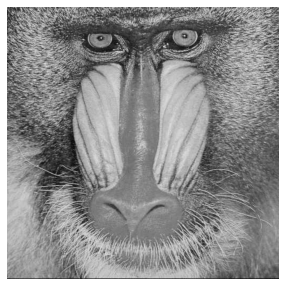

In [1]:
# Section 2.3
# Code listing 2.3

from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the image and converting to a TensorFlow tensor
x_rgb = np.array(Image.open("baboon.jpg")).astype('float32')
x_rgb = tf.constant(x_rgb)

# Defining the matrix used to convert the image to grayscale
grays = tf.constant([[0.3], [0.59] ,[0.11]])

# Converting the image to grayscale
x = tf.matmul(x_rgb, grays)
x = tf.squeeze(x)
print("The size of the final image: {}".format(x.shape))

# Plotting the image
f, axes = plt.subplots(1,1, figsize=(5,5))

axes.imshow(x.numpy(),cmap='gray')
axes.axis('off')

### Convolution operation

The convolution operation shifts a small window of the image while performing a spefic computation at each position, using the parameters of the window and the pixels overlapping the window. Specifically, the computation is taking element-wise multiplication and summing the values to produce a single scalar. 

We will use the convolution operation to perform edge detection on the image of the baboon.

In [9]:
# Section 2.3
import tensorflow as tf
import numpy as np

# Defining the input image
y = tf.constant(x)

# Defining the convolution kernel as a TensorFlow variable
f = tf.Variable(np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]).astype('float32'))

# Reshaping the input and the kernel to meet tf.nn.convolution requirements
y_reshaped = tf.reshape(y, [1,512,512,1]) # [batch size, height, width, channels]
f_reshaped = tf.reshape(f, [3,3,1,1]) # [height, width, in channels, out channels]

# Convolving the images
y_conv = tf.nn.convolution(y_reshaped, f_reshaped)

def improve_contrast(x,n=3):
    """ This is function to improve the contrast in the image for visual purposes. """
    return np.clip(x*n, np.min(x), np.max(x))

y_conv_clipped = improve_contrast(y_conv, 4)
print("The size of the final image: {}".format(y.shape))

The size of the final image: (512, 512)


#### Plotting the results

Text(0.5, 1.0, 'Result after Edge Detection')

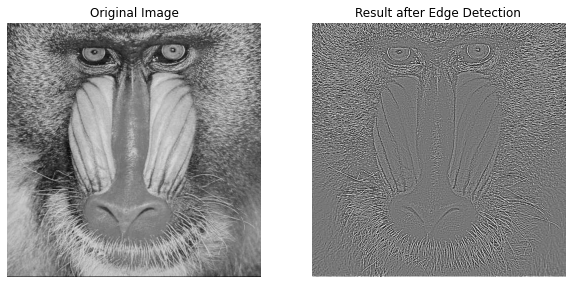

In [10]:
# Section 2.3

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the original image and the convolved image side by side
f, axes = plt.subplots(1,2, figsize=(10,10))

axes[0].imshow(np.squeeze(x.numpy()),cmap='gray')
axes[1].imshow(np.squeeze(y_conv_clipped),cmap='gray')

axes[0].axis('off')
axes[0].set_title('Original Image')
axes[1].axis('off')
axes[1].set_title('Result after Edge Detection')

### Pooling operation

The pooling operation does a similar job to the convolution operation, where it shifts a small window over the image. However, the window itself doesn't have parameters. Therefore at each position the operation produces the maximum value (*max-pooling*) of the overlapping pixels or the average value (*average-pooling*) of the overlapping pixels.

We will use the pooling operation to reduce the size of the edge detected image we produced in the previous step.

In [11]:
# Section 2.3

import tensorflow as tf
import numpy as np

# Performing average and max pooling on the convolved output
z_avg = tf.nn.avg_pool(y_conv, (1,2,2,1), strides=(1,2,2,1), padding='VALID')
z_max = tf.nn.max_pool(y_conv, (1,2,2,1), strides=(1,2,2,1), padding='VALID')

# Removing the dimensions of size 1
z_avg = np.squeeze(z_avg.numpy())
z_max = np.squeeze(z_max.numpy())

print("The size of the final image: {}".format(z_avg.shape))

# We will pad the images with white to make sure they are the same size as the other images
z_avg_padded = np.pad(z_avg, (512-z_avg.shape[0])//2, constant_values=np.max(z_avg))
z_max_padded = np.pad(z_max, (512-z_max.shape[0])//2, constant_values=np.max(z_max))

print("The size of the final image: {}".format(z_avg_padded.shape))

The size of the final image: (255, 255)
The size of the final image: (511, 511)


#### Plotting the results

Text(0.5, 1.0, 'Result after Max-Pooling')

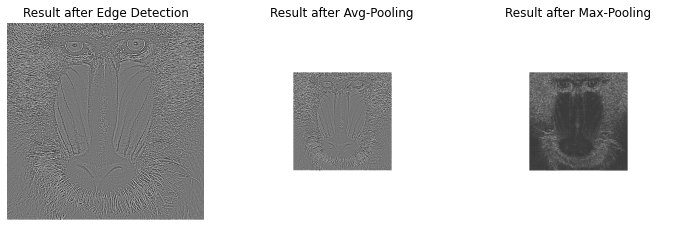

In [12]:
# Section 2.3

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting the convolved output and the results of pooling side-by-side
f, axes = plt.subplots(1,3, figsize=(12,20))
axes[0].imshow(np.squeeze(y_conv_clipped),cmap='gray')
axes[1].imshow(improve_contrast(z_avg_padded,4),cmap='gray')
axes[2].imshow(improve_contrast(z_max_padded,1),cmap='gray')

axes[0].axis('off')
axes[0].set_title('Result after Edge Detection')
axes[1].axis('off')
axes[1].set_title('Result after Avg-Pooling')
axes[2].axis('off')
axes[2].set_title('Result after Max-Pooling')